### Getting the data

##### Please look at the information in the `get_data.ipynb` notebook. You have to end up with `swift.dkrz.de` folder located somwere in your system. All data used in this examples are located in this folder.  

In [1]:
import sys
sys.path.append("../")

import pyfesom as pf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
#%matplotlib notebook
%matplotlib inline
from matplotlib import cm
from netCDF4 import Dataset, MFDataset
from matplotlib.colors import Normalize

no cmocean


First, as usuall load the mesh:

In [2]:
meshpath_z = '/work/ollie/orichter/mesh/oce0_z'
mesh_z = pf.fesom_mesh(meshpath_z, abg=[0,0,0],cavity=False) ## for melt rate we need to deactivate cavity
oce_z_warm = Dataset('/work/ollie/orichter/data/oce0_z/RG47911.2025.oce.mean.nc')
oce_z_cold = Dataset('/work/ollie/orichter/data/oce0cold_z/RG47911.2025.oce.mean.nc')

meshpath_s = '/work/ollie/orichter/mesh/oce0_s'
mesh_s = pf.fesom_mesh(meshpath_s, abg=[0,0,0],cavity='sigma') ## for melt rate we need to deactivate cavity
oce_s_warm = Dataset('/work/ollie/orichter/data/oce0_s/RG47911.2025.oce.mean.nc')
oce_s_cold = Dataset('/work/ollie/orichter/data/oce0cold_s/RG47911.2025.oce.mean.nc')

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


Load data for one year:

In [25]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
def plot_velo(coord,oce,mesh,depth,title):
    
    u = np.mean(oce['u'][-6:,:],0)
    v = np.mean(oce['v'][-6:,:],0)
    
    if depth =='mean':
        
        u_mean = np.zeros_like(mesh.x2)
        v_mean = np.zeros_like(mesh.x2)

        for c in mesh.n32:
            cz = mesh.zcoord[c-1]
            cdz = cz[1:]-cz[:-1]
            cdz[cdz<0]=0
            if sum(cdz)==0.0:
                print(cz)
                print(cdz)
                continue
            weights = cdz/sum(cdz)
            cu = u[c-1]
            cu = 0.5*(cu[1:]+cu[:-1])
            cv = v[c-1]
            cv = 0.5*(cv[1:]+cv[:-1])
            u_mean[c[0]-1] = sum(cu*weights)
            v_mean[c[0]-1] = sum(cv*weights)
        
        mag_uv = np.sqrt(u_mean**2+v_mean**2)*100
            
        depth = 0.0
        bla, elem_no_nan = pf.get_data(u,mesh,depth)
        u = u_mean
        v = v_mean
        
    else:
    
        if coord == "s":
            u, elem_no_nan = pf.get_data_sigma(u,mesh,depth)
            v, elem_no_nan = pf.get_data_sigma(v,mesh,depth)
        else:
            u, elem_no_nan = pf.get_data(u,mesh,depth)
            v, elem_no_nan = pf.get_data(v,mesh,depth)

        mag_uv = np.sqrt(u**2+v**2)*100
    
    plt.figure(figsize=(8,5))
    levels = np.linspace(np.nanmin(mag_uv),np.nanmax(mag_uv),10)
    plt.tricontourf(mesh.x2, mesh.y2, elem_no_nan[::],mag_uv, levels = levels, cmap=cm.Spectral_r, extend='both')
    cbar = plt.colorbar(orientation='horizontal', pad=0.1);
    plt.quiver(mesh.x2[::2], mesh.y2[::2], u[::2], v[::2], scale=10, width=0.002);
    cbar.set_label("speed in cm/s")
    plt.title(title,size=18)
    plt.tight_layout()
    plt.show()

# warm

For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


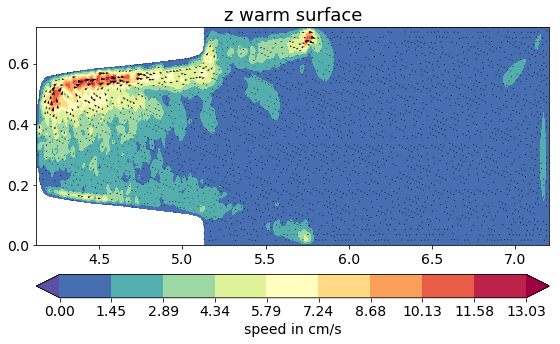

For depth 0.0 model level -0.0 will be used


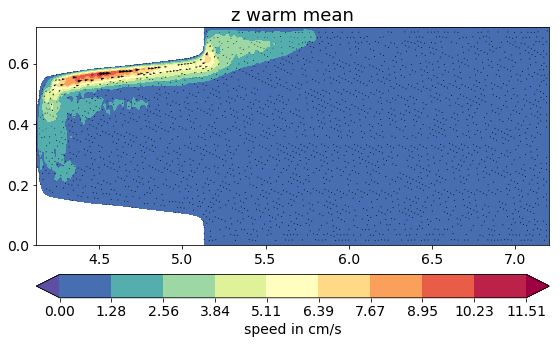

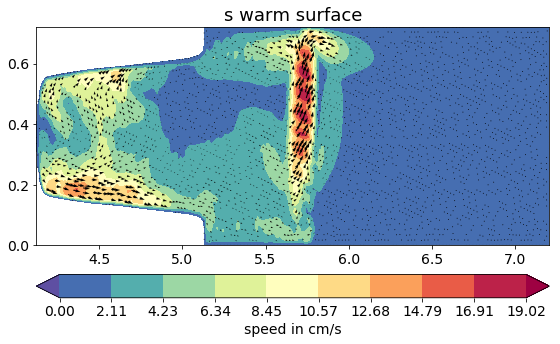

For depth 0.0 model level 0.0 will be used


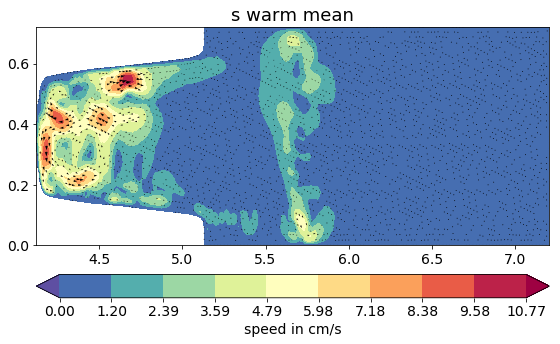

In [28]:
plot_velo('z',oce_z_warm,mesh_z,0,'z warm surface')
plot_velo('z',oce_z_warm,mesh_z,'mean','z warm mean')
plot_velo('s',oce_s_warm,mesh_s,0,'s warm surface')
plot_velo('s',oce_s_warm,mesh_s,'mean','s warm mean')

# cold

For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


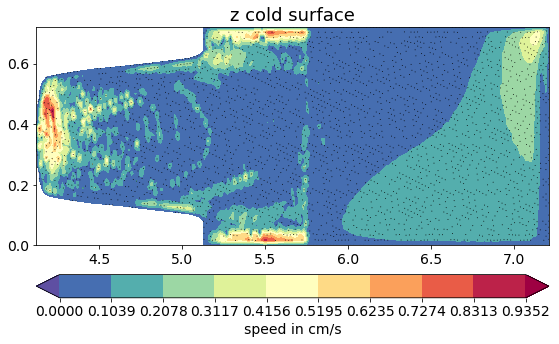

For depth 0.0 model level -0.0 will be used


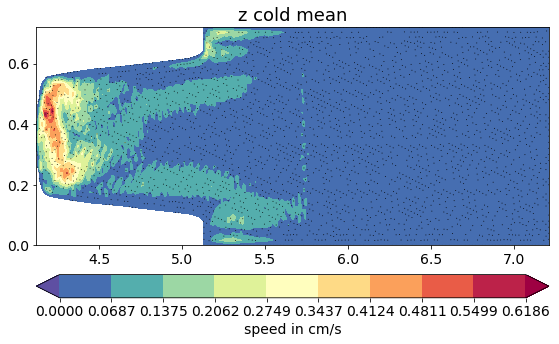

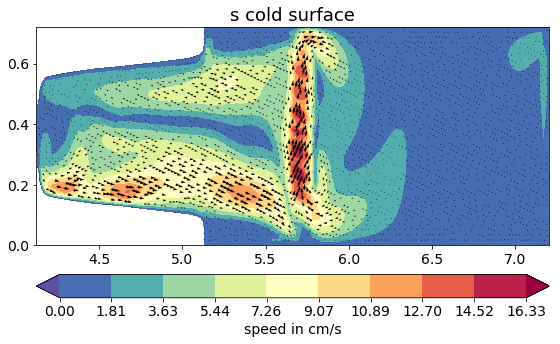

For depth 0.0 model level 0.0 will be used


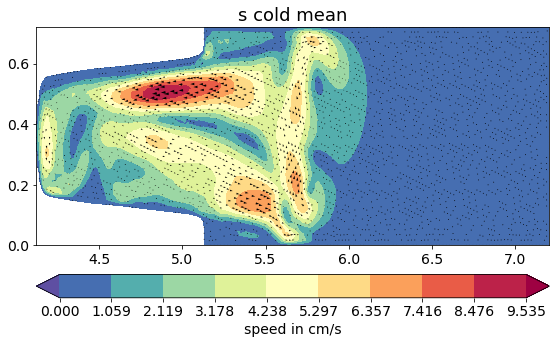

In [29]:
plot_velo('z',oce_z_cold,mesh_z,0,'z cold surface')
plot_velo('z',oce_z_cold,mesh_z,'mean','z cold mean')
plot_velo('s',oce_s_cold,mesh_s,0,'s cold surface')
plot_velo('s',oce_s_cold,mesh_s,'mean','s cold mean')

For depth 200 model level 200.0 will be used
For depth 200 model level 200.0 will be used


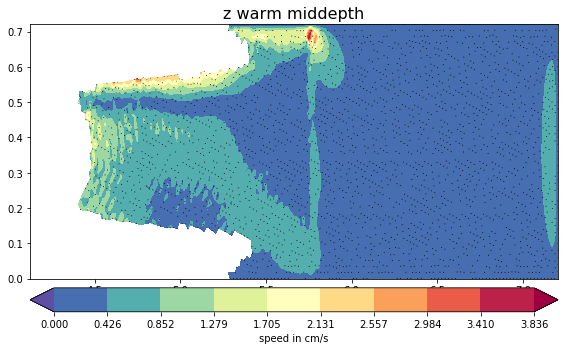

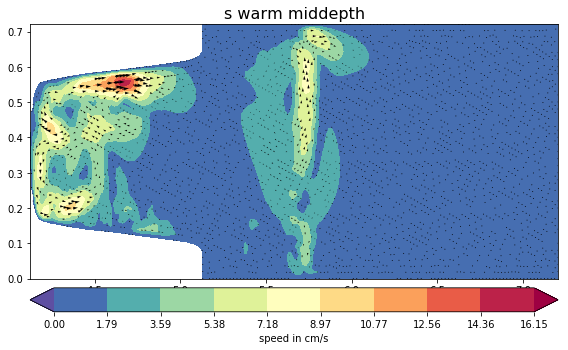

In [73]:
plot_velo('z',oce_z_warm,mesh_z,200,'z warm middepth')
plot_velo('s',oce_s_warm,mesh_s,10,'s warm middepth')

Vector data in FESOM are internally treated on the rotated mesh (it does not matter if the mesh you work with is "rotated" or not). So you have to convert vector data from rotated coordinates to geographical coordinates. We use function vec_rotate_r2g for this. The angles 50, 15, -90 in practice do not change, so it is save to use them. 

In [9]:
level_data_u, elem_no_nan = pf.get_data(fl.variables['u'][0,:],mesh,100)
level_data_v, elem_no_nan = pf.get_data(fl.variables['v'][0,:],mesh,100)
#u, v = pf.vec_rotate_r2g(50, 15, -90, mesh.x2, mesh.y2, level_data_u, level_data_v, flag=1)
mag_uv = np.sqrt(level_data_u**2+level_data_v**2)

For depth 100 model level 100.0 will be used
For depth 100 model level 100.0 will be used


In [16]:
mag_uv.max()

nan

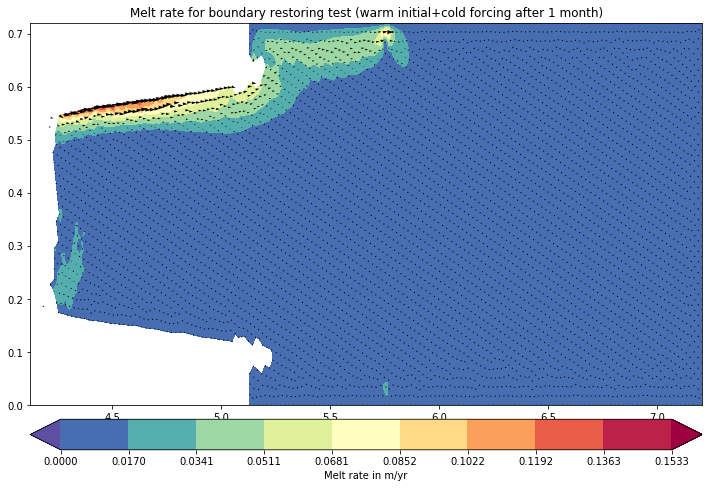

In [18]:
#x, y = m(mesh.x2, mesh.y2)
plt.figure(figsize=(10,7))
#m.drawmapboundary(fill_color='0.9')
#m.drawcoastlines()
#u10_rot, v10_rot, x, y = m.rotate_vector(u, v, mesh.x2, mesh.y2, returnxy=True)

levels = np.linspace(np.nanmin(mag_uv),np.nanmax(mag_uv),10)
plt.tricontourf(mesh.x2, mesh.y2, elem_no_nan[::],mag_uv, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.quiver(mesh.x2, mesh.y2, level_data_u, level_data_v, scale=10, width=0.002);
cbar.set_label("Melt rate in m/yr")
plt.title('Melt rate for boundary restoring test (warm initial+cold forcing after 1 month)')
plt.tight_layout()


So now, the `u` and `v` are the vectors fields in geographical coordinates that we have to work with.  

### Simple arrow plot

For details see [Basemap documentation](https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#quiver). Note, that we rotate vectors to the map projection with `rotate_vector`. Parameter to play with to make the size of arrows better is `scale`. More information on different options in [matplotlib qiver documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.quiver.html).

In [6]:
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=60,\
            llcrnrlon=-100,urcrnrlon=0,lat_ts=20,resolution='c')
x, y = m(mesh.x2, mesh.y2)

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3122: RuntimeWarning: invalid value encountered in greater_equal
  farnorth = np.abs(lats+dlat) >= 90.0


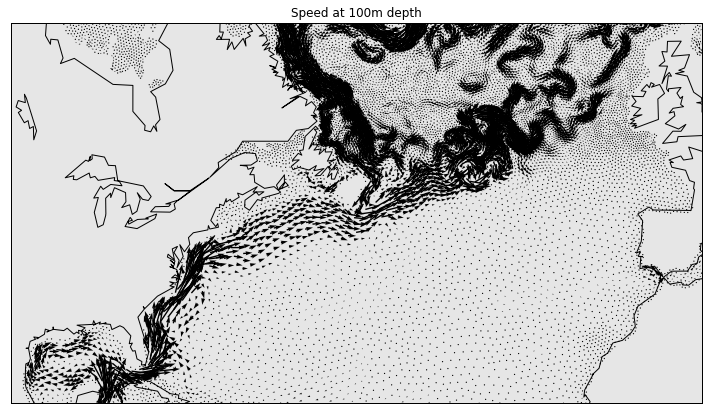

In [7]:
plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
u10_rot, v10_rot, x, y = m.rotate_vector(u, v, mesh.x2, mesh.y2, returnxy=True)
plt.quiver(x, y, u10_rot, v10_rot, scale=10, width=0.002)
plt.title('Speed at 100m depth')
plt.tight_layout()

Same thing but for the Arctic view

In [8]:
m = Basemap(projection='npstere',lon_0=0, boundinglat=70,  resolution='c')
x, y = m(mesh.x2, mesh.y2)

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3122: RuntimeWarning: invalid value encountered in greater_equal
  farnorth = np.abs(lats+dlat) >= 90.0


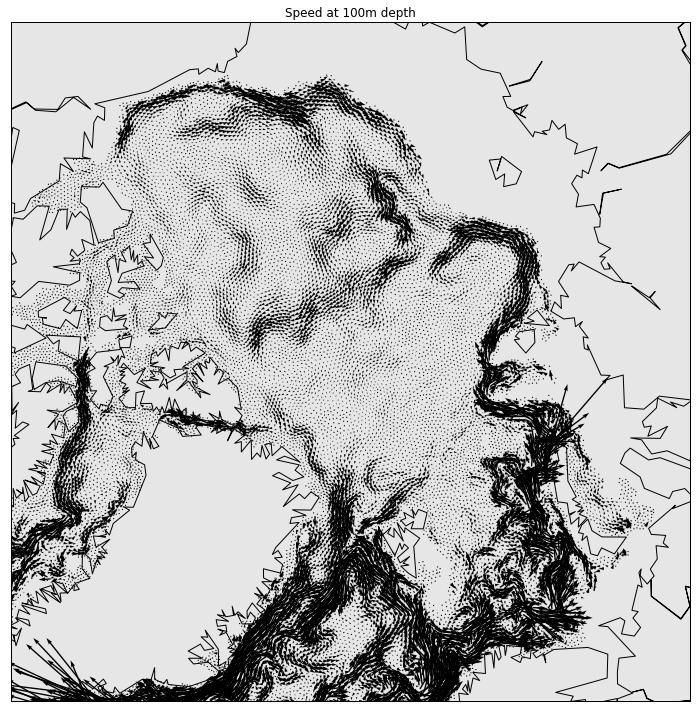

In [9]:
plt.figure(figsize=(10,10))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
u10_rot, v10_rot, x, y = m.rotate_vector(u, v, mesh.x2, mesh.y2, returnxy=True)
m.quiver(x, y, u10_rot, v10_rot, scale=3, width=0.002,)
plt.title('Speed at 100m depth')
plt.tight_layout()

Sometimes it make sence to plot not all point, but some subset:

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3122: RuntimeWarning: invalid value encountered in greater_equal
  farnorth = np.abs(lats+dlat) >= 90.0


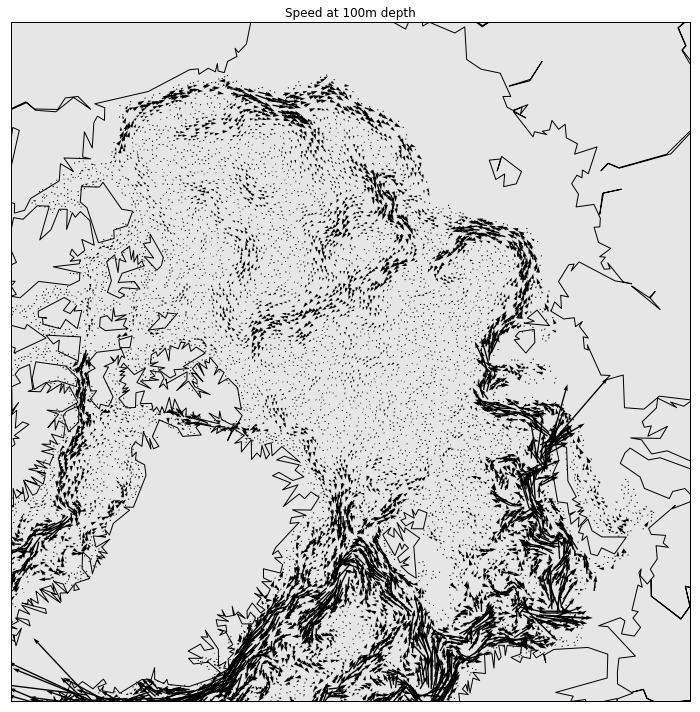

In [10]:
plt.figure(figsize=(10,10))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
u10_rot, v10_rot, x, y = m.rotate_vector(u, v, mesh.x2, mesh.y2, returnxy=True)
m.quiver(x[::2], y[::2], u10_rot[::2], v10_rot[::2], scale=3, width=0.002)
plt.title('Speed at 100m depth')
plt.tight_layout()

## Streamplot

Please have a look at streamplot documentation [in Basemap](https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#streamplot) and in [matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.streamplot.html#matplotlib.axes.Axes.streamplot). 

Streamplot only works with regular data and preferably that it is regular for the map projection you choose. So first we create a regular grid for the progection:

In [11]:
m = Basemap(projection='npstere',lon_0=0, boundinglat=70,  resolution='c')
x, y = m(mesh.x2, mesh.y2)

In [12]:
lons, lats, x, y = m.makegrid(300, 300, returnxy=True)

Then we interpolate our `u` and `v` values to this regular grid:

In [13]:
u_int = pf.fesom2regular(u, mesh, lons, lats, radius_of_influence=80000)
v_int = pf.fesom2regular(v, mesh, lons, lats, radius_of_influence=80000)

Vectors have to be rotated in order to have proper orientation for the map projection:

In [14]:
u10_rot, v10_rot, x, y = m.rotate_vector(u_int, v_int, lons, lats, returnxy=True)

And we calculate the speed to colorise our streamlines:

In [15]:
speed = np.hypot(u10_rot, v10_rot)

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


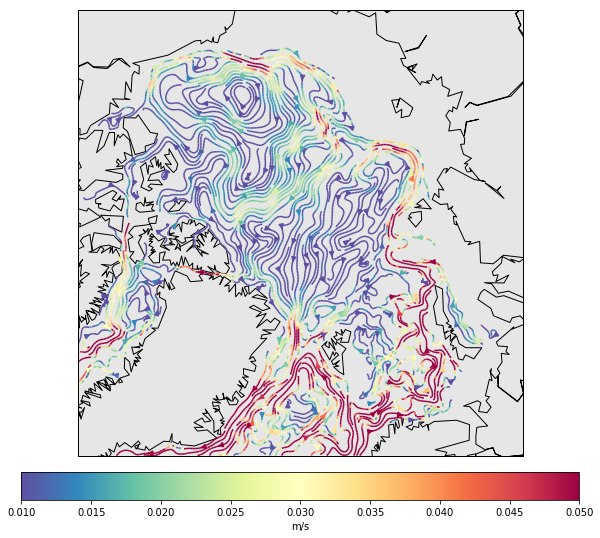

In [16]:
plt.figure(figsize=(10,10))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.streamplot(x, y, u10_rot, v10_rot, color=speed,  density=5, norm = Normalize(vmin=0.01, vmax=0.05), 
             cmap=cm.Spectral_r)
cb = plt.colorbar(orientation = 'horizontal', pad=0.03)
cb.set_label('m/s')

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


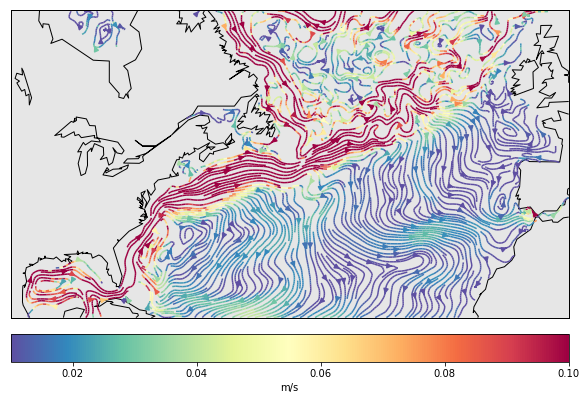

In [17]:
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=60,\
            llcrnrlon=-100,urcrnrlon=0,lat_ts=20,resolution='c')
x, y = m(mesh.x2, mesh.y2)

lons, lats, x, y = m.makegrid(300, 300, returnxy=True)

u_int = pf.fesom2regular(u, mesh, lons, lats, radius_of_influence=80000)
v_int = pf.fesom2regular(v, mesh, lons, lats, radius_of_influence=80000)

u10_rot, v10_rot, x, y = m.rotate_vector(u_int, v_int, lons, lats, returnxy=True)

speed = np.hypot(u10_rot, v10_rot)

plt.figure(figsize=(10,10))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.streamplot(x, y, u10_rot, v10_rot, color=speed,  density=5, norm = Normalize(vmin=0.01, vmax=0.1), 
             cmap=cm.Spectral_r)
cb = plt.colorbar(orientation = 'horizontal', pad=0.03)
cb.set_label('m/s')